In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# %matplotlib inline
plt.style.use("ggplot")

import sklearn
from sklearn.decomposition import TruncatedSVD

In [2]:
ratings = pd.read_csv('../input/destination-review/Destination.csv')
ratings = ratings.dropna()
ratings

,Location,UserId,Rating
0,Goa,1,5
1,Mcleodganj,2,3
2,Srinagar,3,4
3,Andaman,4,4
4,Leh-Ladakh,5,5
5,Andaman,6,2
6,Mcleodganj,7,3
7,Srinagar,8,4
8,Andaman,9,5
9,Mcleodganj,10,5


#### Loading the dataset

In [3]:
ratings.shape

(21, 3)

In [4]:
popular_Location = pd.DataFrame(
    ratings.groupby('Location')['Rating'].count())
most_popular = popular_Location.sort_values('Rating', ascending=False)
most_popular

,Rating
Location,
Andaman,5
Mcleodganj,5
Goa,4
Leh-Ladakh,4
Srinagar,3


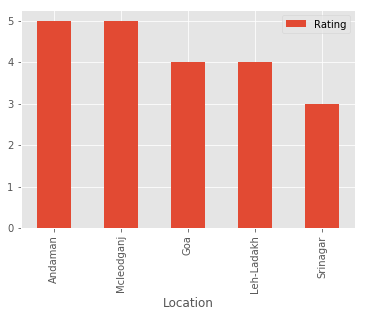

In [5]:
most_popular.head(5).plot(kind = "bar")

In [6]:
ratings1 = ratings.head(10000)

In [7]:
ratings_utility_matrix = ratings1.pivot_table(values='Rating', index='UserId', columns='Location', fill_value=0)
ratings_utility_matrix.head()

Location,Andaman,Goa,Leh-Ladakh,Mcleodganj,Srinagar
UserId,,,,,
1,0.0,4,0,0.0,0
2,0.0,5,0,3.5,0
3,4.5,0,5,0.0,4
4,4.0,0,3,0.0,0
5,0.0,0,5,0.0,0


As expected, the utility matrix obtaned above is sparce, I have filled up the unknown values wth 0.

In [8]:
ratings_utility_matrix.shape

(10, 5)

Transposing the matrix

In [9]:
X = ratings_utility_matrix.T
X.head()

UserId,1,2,3,4,5,6,7,8,9,10
Location,,,,,,,,,,
Andaman,0.0,0.0,4.5,4.0,0.0,2.0,0.0,0.0,5.0,0.0
Goa,4.0,5.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
Leh-Ladakh,0.0,0.0,5.0,3.0,5.0,0.0,4.0,0.0,0.0,0.0
Mcleodganj,0.0,3.5,0.0,0.0,0.0,0.0,3.0,0.0,5.0,5.0
Srinagar,0.0,0.0,4.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0


In [10]:
X.shape

(5, 10)

Unique products in subset of data

In [11]:
X1 = X

### Decomposing the Matrix

In [12]:
SVD = TruncatedSVD(n_components=2)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(5, 2)

In [13]:
i = "Goa"

Location_names = list(X.index)
Location = Location_names.index(i)
Location

1

### Correlation Matrix

correlation_matrix

In [14]:
correlation_product_ID = correlation_matrix[Location]
correlation_product_ID.shape

NameError: name 'correlation_matrix' is not defined

In [15]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(5, 5)

### Recommending top 10 highly correlated products in sequence

In [16]:
Recommend = list(X.index[correlation_product_ID > 0.90])

# Removes the item already bought by the customer
Recommend.remove(i) 

Recommend[0:9]

NameError: name 'correlation_product_ID' is not defined